In [34]:
from __future__ import print_function

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib.pyplot import imshow

data_path = 'raw/'

image_rows = 420
image_cols = 580


#def create_train_data():
train_data_path = os.path.join(data_path, 'train')
train_images = os.listdir(train_data_path)
train_images_subset = train_images[:50]
total_train_subset = len(train_images_subset)
#5635

train_imgs = np.ndarray((total_train_subset, 1, image_rows, image_cols), dtype=np.uint8)
train_imgs_mask = np.ndarray((total_train_subset, 1, image_rows, image_cols), dtype=np.uint8)



i = 0
print('-'*30)
print('Creating training images...')
print('-'*30)
for image_name in train_images_subset:
    if 'mask' in image_name:
        continue
    image_mask_name = image_name.split('.')[0] + '_mask.tif'
    img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)
    img_mask = cv2.imread(os.path.join(train_data_path, image_mask_name), cv2.IMREAD_GRAYSCALE)

    img = np.array([img])
    img_mask = np.array([img_mask])

    train_imgs[i] = img
    train_imgs_mask[i] = img_mask
    train_imgs_name[i]=image_name
    train_imgs_mask_name[i] = image_mask_name
    if i % 10 == 0:
        print('Done: {0}/{1} images'.format(i, total_train_subset))
    i += 1
print('Loading done.')
print('-'*30)
print('How the train data looks - This is the X')
print("image name:" + image_name[1])
print("Shape:"+str(train_imgs.shape[0])+","+str(train_imgs.shape[1]) )
print('-'*30)
print(train_imgs[1])

print('-'*30)
print('How the train mask looks - This is Y')
print("image mask name:" + image_mask_name[5])
print('-'*30)

print(train_imgs_mask[1])
np.save('imgs_train_subset.npy', train_imgs)
np.save('imgs_mask_train_subset.npy', train_imgs_mask)
print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train_subset.npy')
    imgs_mask_train = np.load('imgs_mask_train_subset.npy')
    return imgs_train_subset, imgs_mask_train_subset


#def create_test_data():
train_data_path = os.path.join(data_path, 'test')
test_images = os.listdir(train_data_path)
test_images_subset = test_images[:50]
test_total_subset = len(test_images_subset)


test_imgs = np.ndarray((test_total_subset, 1, image_rows, image_cols), dtype=np.uint8)
test_imgs_id = np.ndarray((test_total_subset, ), dtype=np.int32)

i = 0
print('-'*30)
print('Creating test images...')
print('-'*30)
for image_name in test_images_subset:
    img_id = int(image_name.split('.')[0])
    img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)

    img = np.array([img])

    test_imgs[i] = img
    test_imgs_id[i] = img_id

    if i % 10 == 0:
        print('Done: {0}/{1} images'.format(i, test_total_subset))
    i += 1
print('Loading done.')

np.save('imgs_test_subset.npy', test_imgs)
np.save('imgs_id_test_subset.npy', test_imgs_id)
print('Saving to .npy files done.')

print('-'*30)
print('How the test data looks - This is X for Test')
print('Test image ID - This is X - ID')
print(test_imgs_id[1])

print('-'*30)
print(test_imgs[1])

    
imshow( train_imgs_mask[9,0])


------------------------------
Creating training images...
------------------------------
Done: 0/50 images
Done: 10/50 images
Done: 20/50 images
Loading done.
------------------------------
How the train data looks - This is the X
image name:7
Shape:50,1
------------------------------
[[[  0  98  90 ...,  97  96  94]
  [  0  95  92 ..., 174 173 166]
  [  0 104  93 ..., 178 179 162]
  ..., 
  [  0  44  38 ...,  62  62  61]
  [  0  50  36 ...,  62  62  62]
  [  0  52  38 ...,  59  58  59]]]
------------------------------
How the train mask looks - This is Y
image mask name:_
------------------------------
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
Done: 0/50 images
Done: 10/50 images
Done: 20/50 images
Done: 30/50 images
Done: 40/50 images
Loading done.
Saving to .npy files done.
----

shape of the train images before preprocesing:
420 580
shape of train masks before preprocesing:
420 580
shape of the array after preprocesing:
64 80
shape of train masks after preprocesing:
64 80
Example
[[ 95 106 127 ..., 155 148 137]
 [162 168 150 ..., 147 151 156]
 [150 154 157 ..., 154 149 168]
 ..., 
 [ 51  36  31 ...,  58  62  52]
 [ 49  35  27 ...,  57  53  63]
 [ 40  24  32 ...,  63  61  60]]


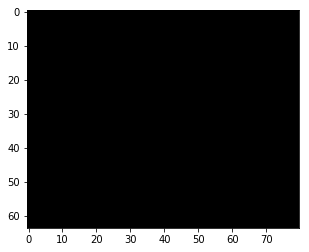

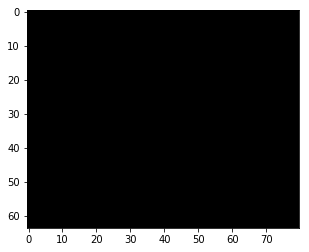

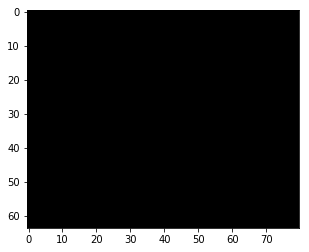

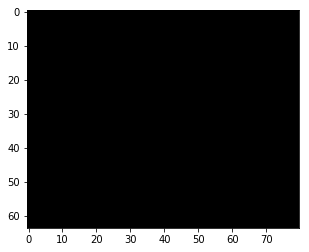

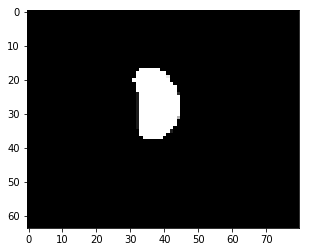

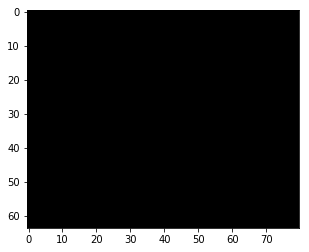

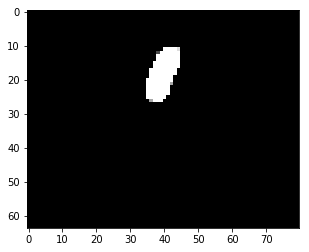

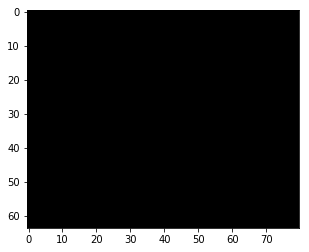

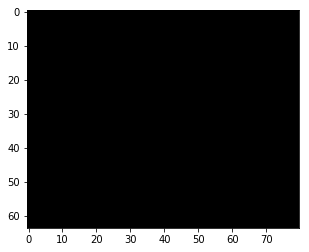

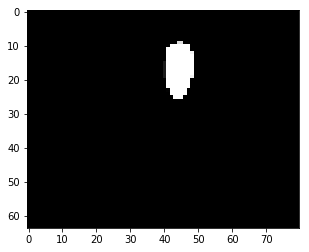

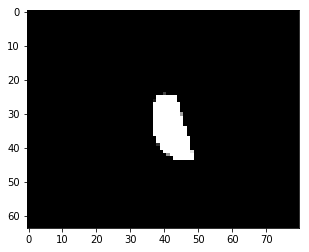

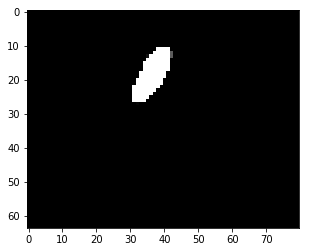

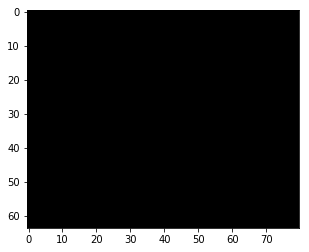

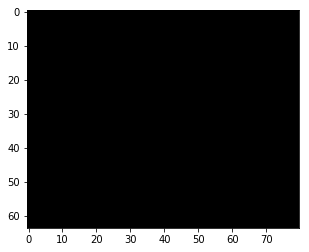

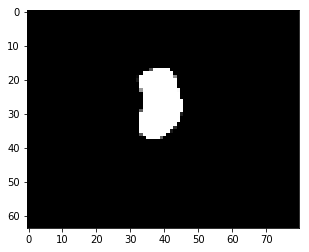

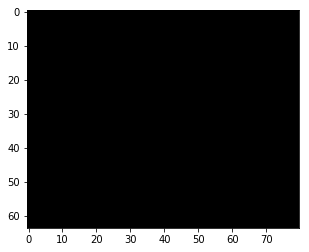

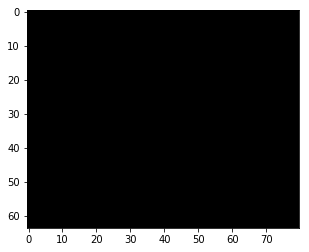

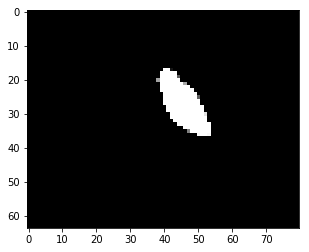

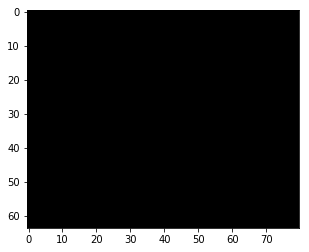

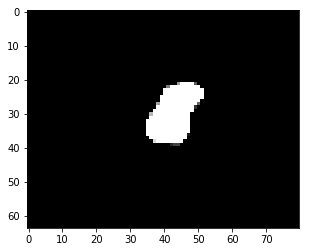

In [44]:
import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from matplotlib.pyplot import imshow
from matplotlib import pyplot

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80

imgs_train = np.load('imgs_train_subset.npy')
imgs_mask_train = np.load('imgs_mask_train_subset.npy')
#shape[0] = 50. The number of images read into the array
print("shape of the train images before preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks before preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p

#preprocess
imgs_train = preprocess(imgs_train)
imgs_mask_train= preprocess(imgs_mask_train)
print("shape of the array after preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks after preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])

print("Example")
print(imgs_train[1,0])
for i in range(20):
    pyplot.imshow(imgs_mask_train[i,0], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [66]:
imgs_train = imgs_train_p.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalizati
print("Mean of images:",mean)
print("Std Deviation of images:",std)

imgs_train -= mean
imgs_train /= std
#After centering and standardization
print(imgs_train[1,0])

Mean of images: 98.6686
Std Deviation of images: 57.4479
[[-0.06385955  0.12761845  0.49316734 ...,  0.98056591  0.85871625
   0.66723824]
 [ 1.10241556  1.20685804  0.89353043 ...,  0.84130919  0.91093755
   0.99797297]
 [ 0.89353043  0.96315879  1.01538002 ...,  0.96315879  0.87612337
   1.20685804]
 ..., 
 [-0.82977158 -1.09087789 -1.17791343 ..., -0.70792192 -0.63829356
  -0.81236446]
 [-0.86458576 -1.10828495 -1.24754179 ..., -0.72532898 -0.7949574
  -0.62088645]
 [-1.02124953 -1.29976296 -1.16050625 ..., -0.62088645 -0.65570062
  -0.67310774]]


In [68]:
imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]
print(imgs_mask_train[1,0])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [79]:
model = get_unet()
print(model.input)


Tensor("input_8:0", shape=(?, 1, 64, 80), dtype=float32)


In [20]:
from __future__ import print_function

import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)




In [18]:
def get_unet():
    
    inputs = Input((1, img_rows, img_cols))
    dropout1 = Dropout(0.25)(inputs)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2),dim_ordering='th')(conv1)
    #imshow(l.activation(inpic)) 

    dropout2 = Dropout(0.25)(pool1)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout2)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv2)

    dropout3 = Dropout(0.25)(pool2)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout3)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv3)

    dropout4 = Dropout(0.25)(pool3)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout4)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv4)

    dropout5 = Dropout(0.25)(pool4)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout5)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv5)

    up6 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up6)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv6)

    up7 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up7)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv7)

    up8 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up8)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv8)

    up9 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid',dim_ordering='th')(conv9)

    model = Model(input=inputs, output=conv10)

    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef],dim_ordering="th")

    return model

In [12]:
import pydot
import graphviz
from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [67]:
import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from matplotlib.pyplot import imshow
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80



imgs_train = np.load('imgs_train_subset.npy')
imgs_mask_train = np.load('imgs_mask_train_subset.npy')
#shape[0] = 50. The number of images read into the array
print("shape of the train images before preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks before preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p

#preprocess
imgs_train = preprocess(imgs_train)
imgs_mask_train= preprocess(imgs_mask_train)
print("shape of the array after preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks after preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalizati
print("Mean of images:",mean)
print("Std Deviation of images:",std)

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]
print(imgs_mask_train[1,0])

print('-'*30)
print('Creating and compiling model...')
print('-'*30)
model = get_unet()
model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', save_best_only=True)

print('-'*30)
print('Fitting model...')
print('-'*30)
datagen = ImageDataGenerator(
            rotation_range=5,
            vertical_flip=True,
            horizontal_flip=True,
            )
model.fit_generator(datagen.flow(imgs_train, imgs_mask_train, batch_size=32, shuffle=True),
            samples_per_epoch=len(imgs_train), nb_epoch=120, verbose=1, callbacks=[model_checkpoint])
#model.fit(imgs_train, imgs_mask_train, batch_size=32, nb_epoch=1, verbose=1, shuffle=True,
 #         callbacks=[model_checkpoint])

print('-'*30)
print('Loading and preprocessing test data...')
print('-'*30)
imgs_test = np.load('imgs_test_subset.npy')
imgs_id = np.load('imgs_id_test_subset.npy')
imgs_test = preprocess(imgs_test)
print("shape of test images after preprocesing:")
print(imgs_test[1,0].shape[0],imgs_test[1,0].shape[1])

imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

print('-'*30)
print('Loading saved weights...')
print('-'*30)
model.load_weights('unet.hdf5')

print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)
imgs_mask_test_1 = np.load('imgs_mask_test.npy')


shape of the train images before preprocesing:
420 580
shape of train masks before preprocesing:
420 580
shape of the array after preprocesing:
64 80
shape of train masks after preprocesing:
64 80
Mean of images: 99.2565
Std Deviation of images: 57.0605
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------


ValueError: NumpyArrayIterator is set to use the dimension ordering convention "tf" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (50, 1, 64, 80) (80 channels).

In [71]:
imgs_mask_test = imgs_mask_train.astype('float32')
imgs_mask_test /= 255.  # scale masks to [0, 1]

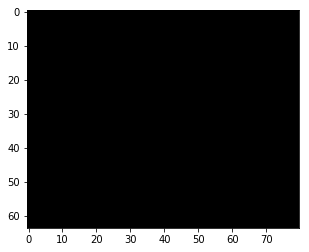

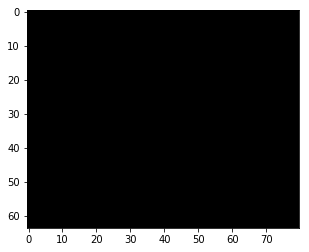

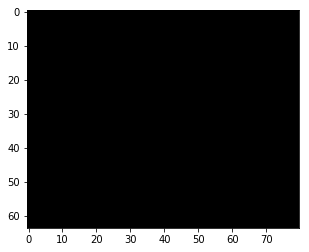

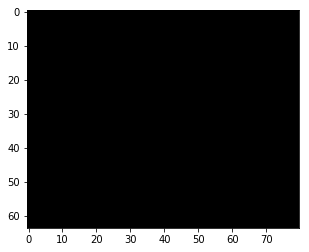

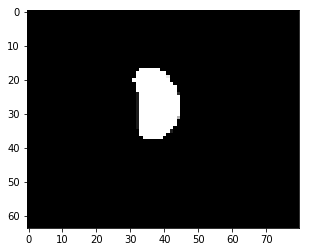

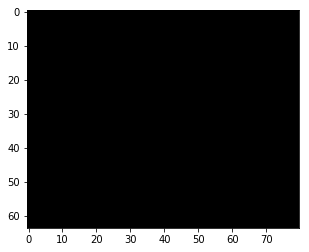

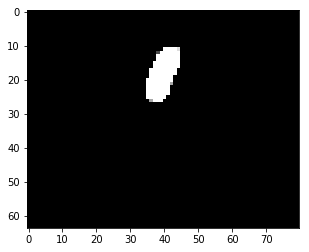

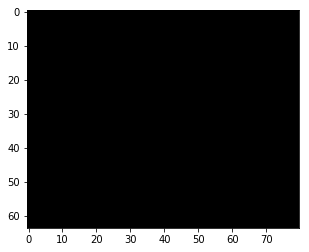

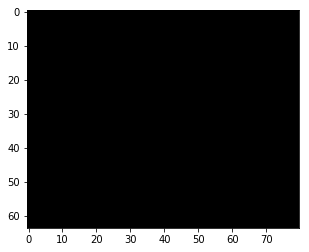

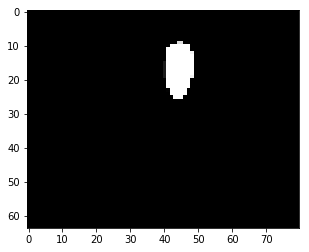

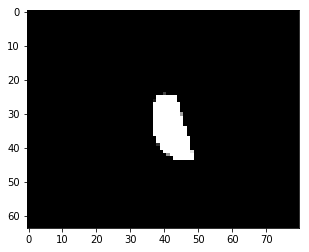

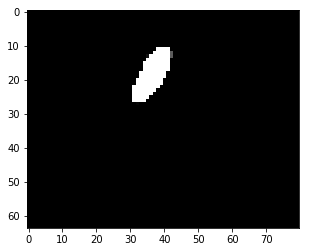

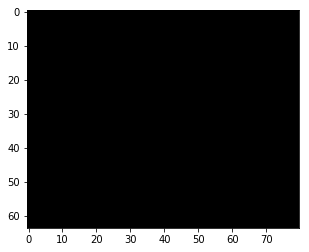

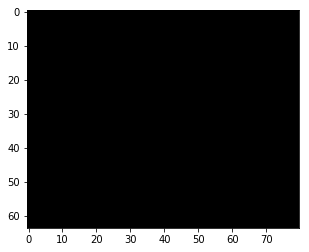

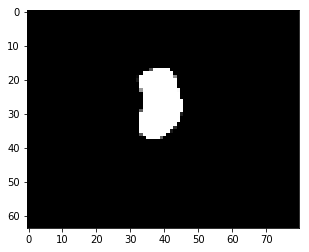

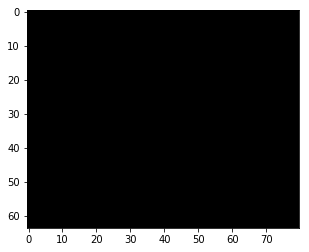

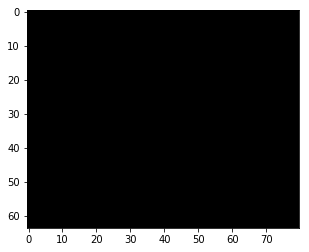

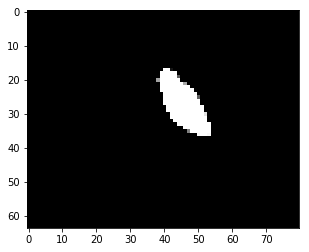

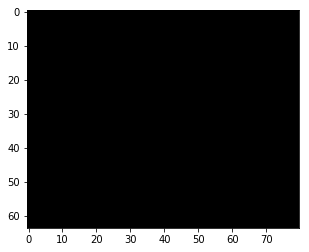

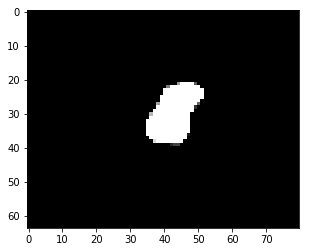

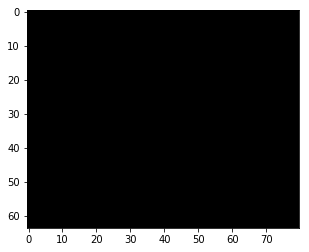

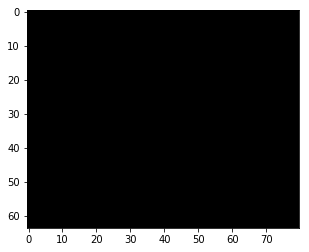

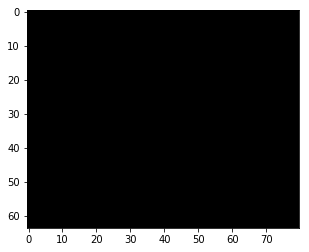

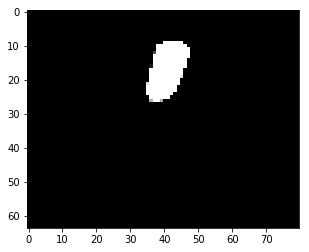

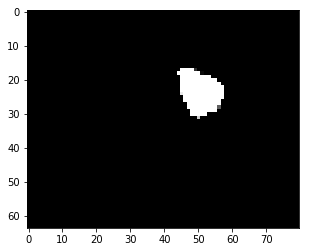

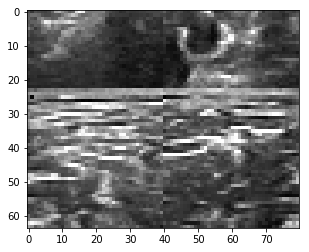

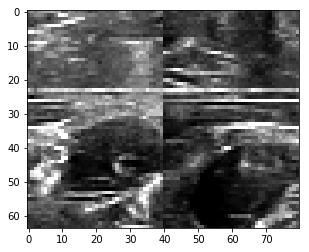

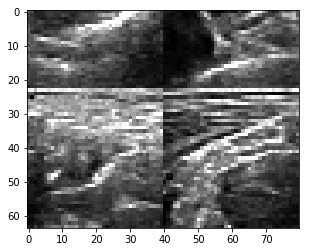

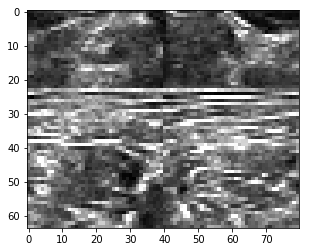

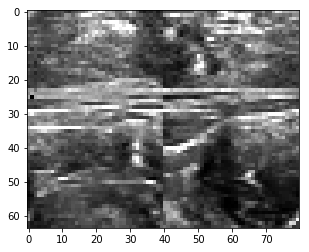

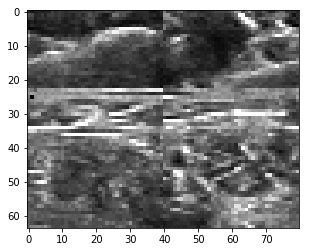

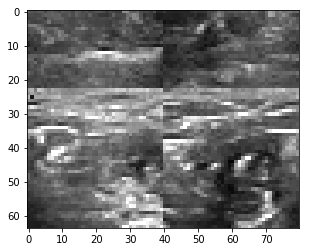

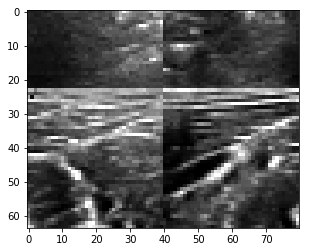

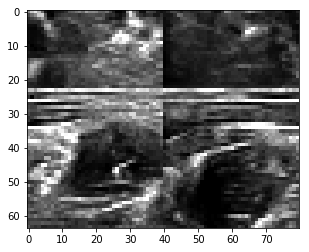

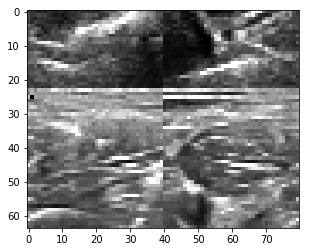

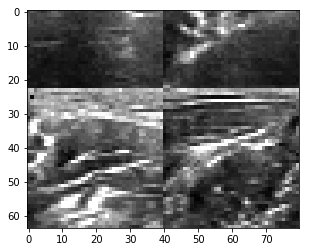

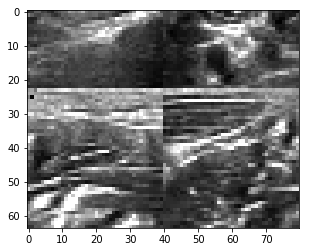

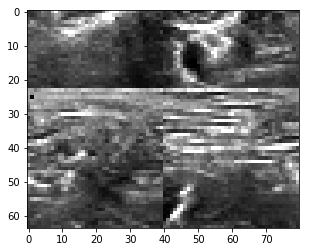

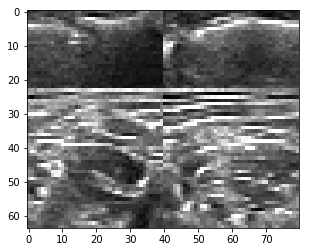

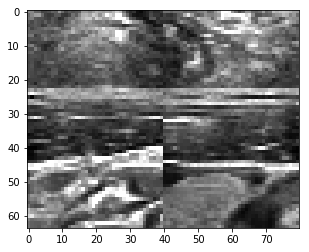

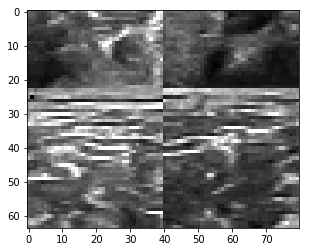

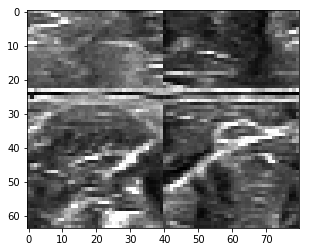

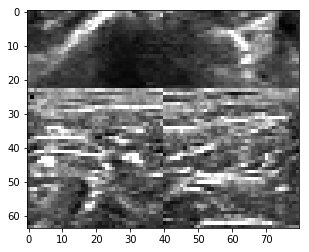

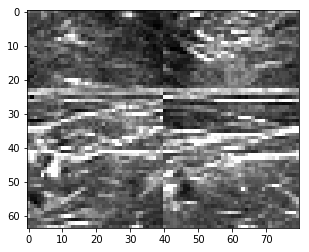

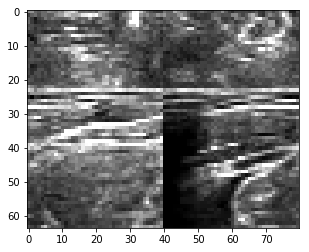

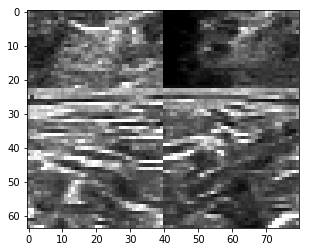

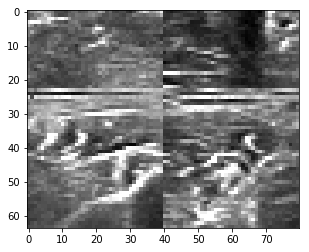

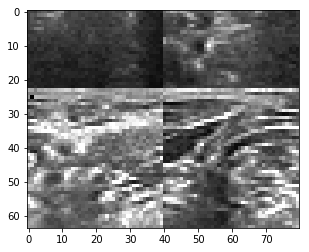

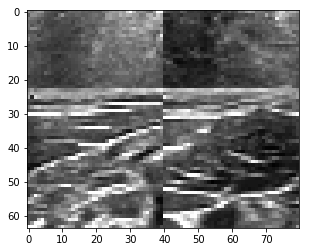

In [72]:

for i in range(0, 49):
    pyplot.imshow(imgs_mask_test[i,0], cmap=pyplot.get_cmap('gray'))
# show the plot
    pyplot.show()


In [62]:
import scipy
from scipy.misc import toimage

#showing images
for i in range(50):
    toimage(imgs_mask_test[i,0]).show()


In [97]:
images_mask = np.load('imgs_mask_test.npy')
#weights = np.load("unet.hdf5")

In [130]:
import scipy.misc
scipy.misc.imsave('outfile2.jpg', images_mask[45,0])

In [103]:
print(images_mask[1,0].shape[0],images_mask[1,0].shape[1])
np.set_printoptions(1000)
print(images_mask[1,0])

64 80
[[ 0.4980376064777374267578125  0.4994350969791412353515625
   0.49926662445068359375      ...,  0.5002605915069580078125
   0.4965451657772064208984375  0.498430669307708740234375 ]
 [ 0.4959774911403656005859375  0.492052137851715087890625
   0.49099338054656982421875   ...,  0.492659389972686767578125
   0.497870266437530517578125   0.4991988837718963623046875]
 [ 0.497955262660980224609375   0.4954138696193695068359375
   0.501735985279083251953125  ...,  0.507055938243865966796875
   0.506964206695556640625      0.511840045452117919921875 ]
 ..., 
 [ 0.505160748958587646484375   0.507014930248260498046875
   0.5051116943359375          ...,  0.502602398395538330078125
   0.498516380786895751953125   0.503094613552093505859375 ]
 [ 0.505894005298614501953125   0.51094973087310791015625
   0.50807094573974609375      ...,  0.5004413127899169921875
   0.502357780933380126953125   0.498652875423431396484375 ]
 [ 0.50375545024871826171875    0.50481784343719482421875
   0.5040987

In [124]:
import numpy as np
import cv2

image_rows = 420
image_cols = 580

def prep(img):
    img = img.astype('float32')
    img = cv2.threshold(img, 0.5, 1., cv2.THRESH_BINARY)[1].astype(np.uint8)
    img = cv2.resize(img, (image_cols, image_rows))
    return img
def run_length_enc(label):
    from itertools import chain
    x = label.transpose().flatten()
    y = np.where(x > 0)[0]
    if len(y) < 10:  # consider as empty
        return ''
    z = np.where(np.diff(y) > 1)[0]
    start = np.insert(y[z+1], 0, y[0])
    end = np.append(y[z], y[-1])
    length = end - start
    res = [[s+1, l+1] for s, l in zip(list(start), list(length))]
    res = list(chain.from_iterable(res))
    return ' '.join([str(r) for r in res])
imgs_test_1 = np.load('imgs_test_subset.npy')
imgs_id_test_1 = np.load('imgs_id_test_subset.npy')
imgs_test_1 = np.load('imgs_mask_test.npy')


print("before sorting, 4th index")
#Returns the indices that would sort an array.
print(imgs_test_1[3,0])
print(imgs_id_test_1[3])

before sorting, 4th index
[[ 0.4989599287509918212890625  0.4968855082988739013671875
   0.4970265328884124755859375 ...,  0.499229013919830322265625
   0.50080001354217529296875    0.50288331508636474609375  ]
 [ 0.49933493137359619140625    0.4901739656925201416015625
   0.4904627501964569091796875 ...,  0.48701560497283935546875
   0.4978673160076141357421875  0.501739203929901123046875 ]
 [ 0.501968324184417724609375   0.506416380405426025390625
   0.50678813457489013671875   ...,  0.503598988056182861328125
   0.505952537059783935546875   0.50886905193328857421875  ]
 ..., 
 [ 0.5013191699981689453125     0.500956594944000244140625
   0.500848948955535888671875  ...,  0.501095235347747802734375
   0.503039181232452392578125   0.499615609645843505859375 ]
 [ 0.50075948238372802734375    0.5018827915191650390625
   0.502083957195281982421875  ...,  0.500911533832550048828125
   0.4993927776813507080078125  0.5001275539398193359375   ]
 [ 0.501008808612823486328125   0.50100874900817

In [123]:
argsort = np.argsort(imgs_id_test_1)
imgs_id_test = imgs_id_test_1[argsort]
imgs_test = imgs_test_1[argsort]

print("before sorting, 4th index")
#Returns the indices that would sort an array.
print(imgs_test[3,0])
print(imgs_id_test[3])


before sorting, 4th index
[[ 0.4993856251239776611328125  0.4955005943775177001953125
   0.4955160915851593017578125 ...,  0.496545970439910888671875
   0.4964471161365509033203125  0.499152123928070068359375 ]
 [ 0.4963849484920501708984375  0.49194049835205078125
   0.485814988613128662109375  ...,  0.4843620955944061279296875
   0.4942933022975921630859375  0.4978442490100860595703125]
 [ 0.4977810382843017578125     0.504170596599578857421875
   0.508452713489532470703125  ...,  0.50918447971343994140625
   0.514371693134307861328125   0.51160275936126708984375  ]
 ..., 
 [ 0.501071393489837646484375   0.502635478973388671875
   0.4992758333683013916015625 ...,  0.4963736832141876220703125
   0.4985148906707763671875     0.500692784786224365234375 ]
 [ 0.503263771533966064453125   0.5057985782623291015625
   0.50362622737884521484375   ...,  0.51373255252838134765625
   0.509351074695587158203125   0.505165576934814453125    ]
 [ 0.50246775150299072265625    0.503537893295288085937

In [125]:
total = imgs_test.shape[0]
ids = []
rles = []
for i in range(total):
    img = imgs_test[i, 0]
    img = prep(img)
    rle = run_length_enc(img)

    rles.append(rle)
    ids.append(imgs_id_test[i])

    if i % 100 == 0:
        print('{}/{}'.format(i, total))

first_row = 'img,pixels'
file_name = 'submission.csv'

with open(file_name, 'w+') as f:
    f.write(first_row + '\n')
    for i in range(total):
        s = str(ids[i]) + ',' + rles[i]
        f.write(s + '\n')


0/50


In [64]:
img_array  = np.load('/home/sneha/Documents/Cognitive/ Mid-Term Project/imgs_mask_test.npy')
output_dir = 'binary_image'

list_of_random_index = [1, 354, 453, 599, 844]

#exist_bool = os.path.isdir('/home/sneha/Documents/Cognitive/ Mid-Term Project/' + "output_files")
 #   if not exist_bool:
#os.mkdir('/home/sneha/Documents/Cognitive/ Mid-Term Project/' + "output_files")

def ensure_directory_exist(directory_name):
    exist_bool = os.path.isdir('./' + directory_name)
    if not exist_bool:
        os.mkdir(directory_name)
def convert_int_array_to_png(image_list):
    ind_id = 1
    for photo_array in image_list:
        name = in_dir + '_' + str(ind_id)
        plot_image_save_to_file(name, photo_array)
        ind_id += 1

def plot_image_save_to_file(name, img_cur):
    #  ensure a directory is present/build if necessary
    save_directory = output_dir  # from global value
    ensure_directory_exist(save_directory)

    #  build full path and save
    file_name = name + '.png'
    full_path = os.path.join(save_directory, file_name)
    imsave(full_path, img_cur)

def get_random_5(img_array_int):
    mySet = set()
    smaller_list = []

    for selected_index in list_of_random_index:
        mySet.add(selected_index)

    i = 0
    while i < len(img_array_int):
        if i in mySet:
            smaller_list.append(img_array_int[i])
        i += 1

    return smaller_list



print(len(img_array))   # will return number of pictures
image_list = []
i = 0
while i < len(img_array):
    for photo_indiv in img_array[i]:
        image = photo_indiv.astype('float32')
        image_list.append(image)
        # plot_image_save_to_file("jack", image)
        # print(image)
    i += 1
smaller_list = get_random_5(img_array_int)
convert_int_array_to_png(smaller_list)



50


NameError: name 'img_array_int' is not defined

In [65]:
import numpy as np
from scipy.misc import toimage, imsave
import os


# in_dir = "imgs_train"
in_dir = "imgs_test"
# in_dir = "imgs_mask_test"
# in_dir = "imgs_mask_train"



img_array = np.load('/home/sneha/Documents/Cognitive/ Mid-Term Project/imgs_mask_test.npy')

output_dir = 'binary_image'

# these are the selected 'random' 5 images to test
# names will be matched by index for now: 1=22, 2=234...
list_of_random_index = [1, 354, 453, 599, 844]

#  output directory
def ensure_directory_exist(directory_name):
    exist_bool = os.path.isdir('/home/sneha/Documents/Cognitive/ Mid-Term Project/' + directory_name)
    if not exist_bool:
        os.mkdir(directory_name)

# use this to show the image rather than save it, if you want
def show_image(image):
    toimage(image).show()

# save the image array to a .png file
def plot_image_save_to_file(name, img_cur):
    #  ensure a directory is present/build if necessary
    save_directory = output_dir  # from global value
    ensure_directory_exist(save_directory)

    #  build full path and save
    file_name = name + '.png'
    full_path = os.path.join(save_directory, file_name)
    imsave(full_path, img_cur)

# convert the numpy array to a int array through .astype('float32')
def convert_numpy_array_to_int_array(img_array):
    print(len(img_array))   # will return number of pictures
    image_list = []
    i = 0
    while i < len(img_array):
        for photo_indiv in img_array[i]:
            image = photo_indiv.astype('float32')
            image_list.append(image)
            # plot_image_save_to_file("jack", image)
            # print(image)
        i += 1
    return image_list

# loop through converted int array and save the image to .png
def convert_int_array_to_png(image_list):
    ind_id = 1
    for photo_array in image_list:
        name = in_dir + '_' + str(ind_id)
        plot_image_save_to_file(name, photo_array)
        ind_id += 1

# create a list of 5 int image array
def get_random_5(img_array_int):
    mySet = set()
    smaller_list = []

    for selected_index in list_of_random_index:
        mySet.add(selected_index)

    i = 0
    while i < len(img_array_int):
        if i in mySet:
            smaller_list.append(img_array_int[i])
        i += 1

    return smaller_list

# wrapper to create 5 'random'(spec. gloablly) .png files to view binary mask
def convert_random_5(img_array_int):
    smaller_list = get_random_5(img_array_int)
    convert_int_array_to_png(smaller_list)

# main wrapper
def main():
    img_array_int = convert_numpy_array_to_int_array(img_array)
    convert_random_5(img_array_int)  # TODO: make sure naming matches
    # convert_all_images(img_array_int) # DONT RUN THIS
main()


50
